##Importing Libraries


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization
from tensorflow.keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.optimizers import SGD

##Exploring the Data

170500096/170498071 [==============================] - 4s 0us/step
Shape of training data: X=(50000, 32, 32, 3) y=(50000, 1)
Shape of test data:(10000, 32, 32, 3) y=(50000, 1)


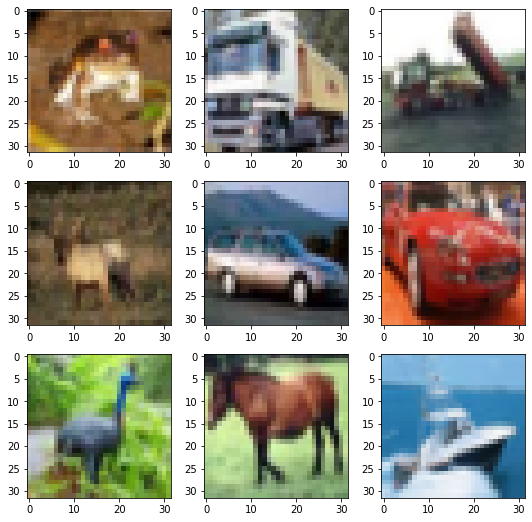

In [ ]:
(X_train, y_train),(X_test, y_test)= cifar10.load_data()
print("Shape of training data: X="+str(X_train.shape)+" y="+str(y_train.shape))
print("Shape of test data:"+ str(X_test.shape)+" y="+str(y_train.shape))
fig=plt.figure(figsize=(9,9))
for i in range(9):
  plt.subplot(3,3, i+1)
  plt.imshow(X_train[i])
plt.show()


##Loading the data

In [ ]:
def load_dataa():
  (X_train, y_train),(X_test, y_test)=cifar10.load_data()
  y_train=to_categorical(y_train)
  y_test=to_categorical(y_test)
  return X_train,y_train,X_test,y_test

##Prepare Pixel Data

In [ ]:
def prepare_data(train,test):
  train_norm=train.astype('float32')
  test_norm=test.astype('float32')
  train_norm=train_norm/255.0
  test_norm=test_norm/255.0
  return train_norm,test_norm

##Define the Model

In [ ]:
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.3))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dropout(0.5))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model


##Evaluate Model

In [ ]:
def evaluate_model(model,X_train,y_train,X_test,y_test):
  history=model.fit(X_train,y_train, batch_size=64, epochs=400, verbose=0, validation_data=(X_test,y_test))
  _,acc=model.evaluate(X_test,y_test,verbose=0)
  return history,acc

##Present Results

In [ ]:
def present_results(history):
  plt.subplot(2,1,1)
  plt.title('loss')
  plt.plot(history.history['loss'],color='blue',label='train')
  plt.plot(history.history['val_loss'],color='orange',label='test')
  plt.subplot(2,1,2)
  plt.title('accuracy')
  plt.plot(history.history['accuracy'],color='blue',label='train')
  plt.plot(history.history['val_accuracy'],color='orange',label='test')

In [ ]:
def run_model():  
  X_train,y_train,X_test, y_test=load_dataa()
  X_train,X_test=prepare_data(X_train,X_test)
  model=define_model()
  #create data generator
  datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
  #prepare iterator
  it_train = datagen.flow(X_train, y_train, batch_size=64)
  #fit model
  steps = int(X_train.shape[0] / 64)
  history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=200, validation_data=(X_test, y_test), verbose=0)
  #evaluate model
  _, acc = model.evaluate(X_test, y_test, verbose=0)
  print('Accuracy > %.3f' % (acc * 100.0))
  present_results(history)

In [ ]:
run_model()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
